In [1]:
################################################## initialization. ##################################################

# import pandas as pd
import numpy as np
from itertools import cycle
from platform import python_version
import pickle
# print(python_version())
# print(pickle.format_version)
# import theano
# print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow
# print('tensorflow: %s' % tensorflow.__version__)
# keras
from tensorflow import keras 
# print('keras: %s' % keras.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import modin.pandas as mpd
import pandas as pd

# import ray
# ray.init(_plasma_directory="/tmp")  # setting to disable out of core in Ray
# df = pd.read_csv("some.csv")
# import cudf
#from sklearn.experimental import enable_iterative_imputer
#from sklean.impute import IterativeImputer

##### Read in the SAWS data into dataframes representing each weather station

In [2]:
# ############################################### Read In The Excel Files ###################################################
# ## Store each file into dataframe representing a weather station location
# ## Each dataframe has columns "ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"

# ### JHB
# jhb = pd.read_excel('JHB.xlsx', engine='openpyxl')
# #display(jhb.head())

# ### Ermelo 
# ermelo = pd.read_excel('Ermelo.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(ermelo.head())

# ### Thabazimbi
# thabazimbi = pd.read_excel('Thabazimbi.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(thabazimbi.head())

# ### Cape Point
# capePoint = pd.read_excel('Cape Point.xlsx', engine='openpyxl')
# # display(capePoint.head())

# ### Cedara
# cedara = pd.read_excel('Cedara.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(cedara.head())

# ### Coffee Bay
# coffeeBay = pd.read_excel('Coffee Bay.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(coffeeBay.head())

# ### Kuruman
# kuruman = pd.read_excel('Kuruman.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(kuruman.head())

# ### Ottosdal
# ottosdal = pd.read_excel('Ottosdal.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(ottosdal.head())

# ### Welkom
# welkom = pd.read_excel('Welkom.xlsx', engine='openpyxl', names=["ClimNo", "StasName", "Latitude", "Longitude", "DateT", "Temperature", "Humidity", "WindSpeed", "WindDir", "Pressure", "Rain"])
# # display(welkom.head())



##### Read In the SALDN data into a dataframe

In [3]:
# #read in the SALDN flash data

# data1 = pd.read_csv('ProcessFlash_2007_June2016-004.csv', sep="," , names=["TimeStamp", "nanoseconds", "Latitude", "Longitude", "if_ignore", "peak_current_flash", "c7", "c8", "c9", "c10", "c11", "c12", "c13", "c14", "c15", "c16", "c17", "c18", "c19", "c20", "c21"])
# data2 = pd.read_csv('ProcessFlash_2007_June2016-005.csv', sep="," , names=["TimeStamp", "nanoseconds", "Latitude", "Longitude", "if_ignore", "peak_current_flash", "c7", "c8", "c9", "c10", "c11", "c12", "c13", "c14", "c15", "c16", "c17", "c18", "c19", "c20", "c21"])


#### Place the lightning data into dataframes representing 50km square redions around each station 


##### Create 50km area around the selected weather stations and return dataframe of  each weather stations with lightning occurence data.

In [4]:

# ############################################################################################################################
# ##### Create dataframes 
# # Create LDN for the 50x50 area around JHB weather station
# jhb_ldn1 = data1.loc[(data1.Latitude <= -25.74) & (data1.Latitude >= -26.50) & (data1.Longitude <= 28.63) & (data1.Longitude >= 27.83)]
# jhb_ldn2 = data2.loc[(data2.Latitude <= -25.74) & (data2.Latitude >= -26.50) & (data2.Longitude <= 28.63) & (data2.Longitude >= 27.83)]

# frames = [jhb_ldn1, jhb_ldn2]
# jhb_ldn = pd.concat(frames)

# jhb_ldn['TimeStamp'] =  pd.to_datetime(jhb_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (jhb_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (jhb_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# jhb_ldn = jhb_ldn.loc[mask]
# #display(jhb_ldn.info())

# ################################
# ################################

# #create and combine lightning data for Ermelo
# # Create LDN for the 50x50 area around Ermelo weather station
# ermelo_ldn1 = data1.loc[(data1.Latitude <= -26.1) & (data1.Latitude >= -26.9) & (data1.Longitude <= 29.78) & (data1.Longitude >= 28.98)]
# ermelo_ldn2 = data2.loc[(data2.Latitude <= -26.1) & (data2.Latitude >= -26.9) & (data2.Longitude <= 29.78) & (data2.Longitude >= 28.98)]

# frames = [ermelo_ldn1, ermelo_ldn2]
# ermelo_ldn = pd.concat(frames)


# ermelo_ldn['TimeStamp'] =  pd.to_datetime(ermelo_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (ermelo_ldn['TimeStamp'] > '2013-01-01 00:00:00') & (ermelo_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# ermelo_ldn = ermelo_ldn.loc[mask]
# #display(ermelo_ldn.info())

# ################################
# ################################

# # Create and combine lightning data for Thabazimbi
# # Create LDN for the 50x50 area around Thabazimbi weather station

# thaba_ldn1 = data1.loc[(data1.Latitude <= -24.18) & (data1.Latitude >= -24.98) & (data1.Longitude <= 27.81) & (data1.Longitude >= 27.01)]
# thaba_ldn2 = data2.loc[(data2.Latitude <= -24.18) & (data2.Latitude >= -24.98) & (data2.Longitude <= 27.81) & (data2.Longitude >= 27.01)]

# frames = [thaba_ldn1, thaba_ldn2]
# thaba_ldn = pd.concat(frames)

# thaba_ldn['TimeStamp'] =  pd.to_datetime(thaba_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (thaba_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (thaba_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# thaba_ldn = thaba_ldn.loc[mask]
# #display(thaba_ldn.info())

# ################################
# ################################

# # Create and combine lightning data for Cape-Point WS
# # Create LDN for the 50x50 area around Cape-Point weather station

# cpt_ldn1 = data1.loc[(data1.Latitude <= -33.95) & (data1.Latitude >= -34.75) & (data1.Longitude <= 18.89) & (data1.Longitude >= 18.09)]
# cpt_ldn2 = data2.loc[(data2.Latitude <= -33.95) & (data2.Latitude >= -34.75) & (data2.Longitude <= 18.89) & (data2.Longitude >= 18.09)]


# frames = [cpt_ldn1, cpt_ldn2]
# cpt_ldn = pd.concat(frames)

# cpt_ldn['TimeStamp'] =  pd.to_datetime(cpt_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (cpt_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (cpt_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# cpt_ldn = cpt_ldn.loc[mask]
# #display(cpt_ldn.info())

# ################################
# ################################

# #cedara
# # Create LDN for the 50x50 area around Cedara weather station

# cedara_ldn1 = data1.loc[(data1.Latitude <= -29.14) & (data1.Latitude >= -29.94) & (data1.Longitude <= 30.67) & (data1.Longitude >= 29.87)]
# cedara_ldn2 = data2.loc[(data2.Latitude <= -29.14) & (data2.Latitude >= -29.94) & (data2.Longitude <= 30.67) & (data2.Longitude >= 29.87)]

# frames = [cedara_ldn1, cedara_ldn2]
# cedara_ldn = pd.concat(frames)

# cedara_ldn['TimeStamp'] =  pd.to_datetime(cedara_ldn['TimeStamp'],infer_datetime_format=True)
# mask = (cedara_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (cedara_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# cedara_ldn = cedara_ldn.loc[mask]
# #display(cedara_ldn.info())

# ################################
# ################################
# #coffeeBay
# # Create LDN for the 50x50 area around CoffeeBayweather station

# coffeeBay_ldn1 = data1.loc[(data1.Latitude <= -31.57) & (data1.Latitude >= -32.37) & (data1.Longitude <= 27.53) & (data1.Longitude >= 26.73)]
# coffeeBay_ldn2 = data2.loc[(data2.Latitude <= -31.57) & (data2.Latitude >= -32.37) & (data2.Longitude <= 27.53) & (data2.Longitude >= 26.73)]


# frames = [coffeeBay_ldn1, coffeeBay_ldn2]
# coffeeBay_ldn = pd.concat(frames)

# coffeeBay_ldn['TimeStamp'] =  pd.to_datetime(coffeeBay_ldn['TimeStamp'], infer_datetime_format=True)

# mask = (coffeeBay_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (coffeeBay_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# coffeeBay_ldn = coffeeBay_ldn.loc[mask]
# #display(coffeeBay_ldn.info())

# ################################
# ################################
# #Kuruman
# # Create LDN for the 50x50 area around Kuruman weather station


# kuruman_ldn1 = data1.loc[(data1.Latitude <= -30.79) & (data1.Latitude >= -31.59) & (data1.Longitude <= 25.36) & (data1.Longitude >= 24.56)]
# kuruman_ldn2 = data2.loc[(data2.Latitude <= -30.79) & (data2.Latitude >= -31.59) & (data2.Longitude <= 25.36) & (data2.Longitude >= 24.56)]


# frames = [kuruman_ldn1, kuruman_ldn2]
# kuruman_ldn = pd.concat(frames)

# kuruman_ldn['TimeStamp'] =  pd.to_datetime(kuruman_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (kuruman_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (kuruman_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# kuruman_ldn = kuruman_ldn.loc[mask]
# #display(kuruman_ldn.info())

# ################################
# ################################
# #Ottosdal
# # Create LDN for the 50x50 area around Ottosdal weather station

# ottosdal_ldn1 = data1.loc[(data1.Latitude <= -26.41) & (data1.Latitude >= -27.21) & (data1.Longitude <= 26.41) & (data1.Longitude >= 25.61)]
# ottosdal_ldn2 = data2.loc[(data2.Latitude <= -26.41) & (data2.Latitude >= -27.21) & (data2.Longitude <= 26.41) & (data2.Longitude >= 25.61)]


# frames = [ottosdal_ldn1, ottosdal_ldn2]
# ottosdal_ldn = pd.concat(frames)

# ottosdal_ldn['TimeStamp'] =  pd.to_datetime(ottosdal_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (ottosdal_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (ottosdal_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# ottosdal_ldn = ottosdal_ldn.loc[mask]
# #display(ottosdal_ldn.info())

# ################################
# ################################
# #Welkom
# # Create LDN for the 50x50 area around Welkom weather station

# welkom_ldn1 = data1.loc[(data1.Latitude <= -27.59) & (data1.Latitude >= -28.39) & (data1.Longitude <= 27.07) & (data1.Longitude >= 26.27)]
# welkom_ldn2 = data2.loc[(data2.Latitude <= -27.59) & (data2.Latitude >= -28.39) & (data2.Longitude <= 27.07) & (data2.Longitude >= 26.27)]


# frames = [welkom_ldn1, welkom_ldn2]
# welkom_ldn = pd.concat(frames)

# welkom_ldn['TimeStamp'] =  pd.to_datetime(welkom_ldn['TimeStamp'], infer_datetime_format=True)
# mask = (welkom_ldn['TimeStamp'] > '2012-01-01 00:00:00') & (welkom_ldn['TimeStamp'] <= '2012-12-31 23:59:59')
# welkom_ldn = welkom_ldn.loc[mask]
# #display(welkom_ldn.info())


#### We store our LDN dataframe into pickle files so that we do not have to re-run them again

In [5]:
# ###############################Store LDN dataframes into pickle files ###############################################

# jhb_ldn.to_pickle('jhb_ldn.pkl')
# coffeeBay_ldn.to_pickle('coffeeBay_ldn.pkl')
# ermelo_ldn.to_pickle('ermelo_ldn.pkl')
# thaba_ldn.to_pickle('thabazimbi_ldn.pkl')
# cedara_ldn.to_pickle('cedara_ldn.pkl')
# kuruman_ldn.to_pickle('kuruman_ldn.pkl')
# ottosdal_ldn.to_pickle('ottosdal_ldn.pkl')
# welkom_ldn.to_pickle('welkom_ldn.pkl')
# cpt_ldn.to_pickle('cpt_ldn.pkl')

In [6]:
# ###############################Read LDN dataframes from pickle files ###############################################

cedara_ldn = pd.read_pickle('cedara_ldn.pkl')
jhb_ldn = pd.read_pickle('jhb_ldn.pkl')
cpt_ldn = pd.read_pickle('cpt_ldn.pkl')
ermelo_ldn = pd.read_pickle('ermelo_ldn.pkl') 
thaba_ldn = pd.read_pickle('thabazimbi_ldn.pkl')
kuruman_ldn = pd.read_pickle('kuruman_ldn.pkl')
coffeeBay_ldn = pd.read_pickle('coffeeBay_ldn.pkl')
ottosdal_ldn = pd.read_pickle('ottosdal_ldn.pkl')
welkom_ldn = pd.read_pickle('welkom_ldn.pkl')

In [7]:
print(cpt_ldn.info())
print(welkom_ldn.info())
print(jhb_ldn.info())
print(ottosdal_ldn.info())
print(coffeeBay_ldn.info())
print(kuruman_ldn.info())
print(cedara_ldn.info())
print(thaba_ldn.info())
print(ermelo_ldn.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 821409 to 5435557
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TimeStamp           116 non-null    datetime64[ns]
 1   nanoseconds         116 non-null    int64         
 2   Latitude            116 non-null    float64       
 3   Longitude           116 non-null    float64       
 4   if_ignore           116 non-null    int64         
 5   peak_current_flash  116 non-null    int64         
 6   c7                  116 non-null    float64       
 7   c8                  116 non-null    int64         
 8   c9                  116 non-null    int64         
 9   c10                 116 non-null    int64         
 10  c11                 116 non-null    float64       
 11  c12                 116 non-null    float64       
 12  c13                 116 non-null    float64       
 13  c14                 116 non-null    float

### We create a dataframe for each weather station using SAWS and SALDN data and then add the classification feature _lightning_occur_ which tells us whether or not there had been some lightning experienced at that hour.


### CAPEPOINT

In [8]:
# # sample the lightning dataframe of each weather station into 200 random samples
# #take all of them for this dataframe because it is of 20 rows

# #CAPEPOINT
# #We take 700 lightning occurence days
# cpt_ldn = cpt_ldn

# capePoint["lightning_occur"] = 0   #create column populated with zeros to depict ligthning occurrence

# date_array = cpt_ldn.TimeStamp.unique()#create a date array used to traverse the dates at which lightning occurred

# for i in range (len(date_array)):
#     capePoint.at[(capePoint.DateT.dt.strftime('%Y-%m-%d') == mpd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (capePoint.DateT.dt.strftime('%H') == mpd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1


    
# # mask = (capePoint['DateT'] > '2012-01-01 00:00:00') & (capePoint['DateT'] <= '2012-06-31 23:59:59') #select within the year 2012
# # print(capePoint.loc[mask])
# # capePoint = capePoint.loc[mask] #we are taking the 1000 days where lightning does not occur

    
# display(capePoint.head(10))
# # display(capePoint.lightning_occur.unique())


### CEDARA

In [9]:
# ##Cedara

# ##will have to drop the sample, do it when running on the cluster.
# cedara["lightning_occur"] = 0

# date_array = cedara_ldn.TimeStamp.unique()


# ##for loop to set lightning occurence
# for i in range (len(date_array)):
#     cedara.at[(cedara.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (cedara.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1

# # cedara.to_pickle('cedara.pkl') #create LDN dataframe pickle file that has the lightning occurence column


# # mask = (cedara['DateT'] > '2012-01-01 00:00:00') & (cedara['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # cedara_2012 = cedara.loc[mask]


# display(cedara.info())
# # display(cedara.lightning_occur.unique())

### COFFEEBAY

In [10]:
# ##coffee Bay
# coffeeBay["lightning_occur"] = 0

# date_array = coffeeBay_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence
# for i in range (len(date_array)):
#     coffeeBay.at[(coffeeBay.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (coffeeBay.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1
    

# # mask = (coffeeBay['DateT'] > '2012-01-01 00:00:00') & (coffeeBay['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # coffeeBay_2012 = coffeeBay.loc[mask]

# display(coffeeBay.info())
# # display(coffeeBay_train.lightning_occur.unique())

### KURUMAN

In [11]:
# ##Kuruman

# kuruman["lightning_occur"] = 0

# date_array = kuruman_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence
# for i in range (len(date_array)):
#     kuruman.at[(kuruman.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (kuruman.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1
    

# # mask = (kuruman['DateT'] > '2012-01-01 00:00:00') & (kuruman['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # kuruman_2012 = kuruman.loc[mask]


# display(kuruman.info())
# # display(kuruman_train.lightning_occur.unique())

### WELKOM

In [12]:
# ##Welkom
# #taking a sample of a thousand fero the ldn
# welkom["lightning_occur"] = 0

# date_array = welkom_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence

# #traverse through the weather station and set the lightning occur features usign the values you got from the sample
# for i in range (len(date_array)):
#     welkom.at[(welkom.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (welkom.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1
    

# # mask = (welkom['DateT'] > '2012-01-01 00:00:00') & (welkom['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # welkom_2012 = welkom.loc[mask]

# # welkom_train = pd.concat([welkom1,welkom0])

# display(welkom.info())


### JOHANNESBURG

In [13]:
# ##jhb

# jhb["lightning_occur"] = 0

# date_array = jhb_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence

# for i in range (len(date_array)):
#     jhb.at[(jhb.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (jhb.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1
    


# # mask = (jhb['DateT'] > '2012-01-01 00:00:00') & (jhb['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # jhb_2012 = jhb.loc[mask]


# display(jhb.info())
# # display(jhb_train.lightning_occur.unique())

### ERMELO

In [14]:
# ##Ermelo

# ermelo["lightning_occur"] = 0

# date_array = ermelo_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence
# for i in range (len(date_array)):
#     ermelo.at[(ermelo.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (ermelo.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1


# # mask = (ermelo['DateT'] > '2012-01-01 00:00:00') & (ermelo['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # ermelo_2012 = ermelo.loc[mask]


# display(ermelo.info())
# # display(ermelo_train.lightning_occur.unique())


### THABAZIMBI

In [15]:
# ##Thabazimbi

# thabazimbi["lightning_occur"] = 0

# date_array = thaba_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence
# for i in range (len(date_array)):
#     thabazimbi.at[(thabazimbi.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (thabazimbi.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1
    

# # mask = (thabazimbi['DateT'] > '2012-01-01 00:00:00') & (thabazimbi['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# # thabazimbi_2012 = thabazimbi.loc[mask]


# display(thabazimbi.head(10))
# # display(thabazimbi_new.lightning_occur.unique())

### OTTOSDAL

In [16]:
# ##Ottosdal

# ottosdal["lightning_occur"] = 0

# date_array = ottosdal_ldn.TimeStamp.unique()

# ##for loop to set lightning occurence
# for i in range (len(date_array)):
#     ottosdal.at[(ottosdal.DateT.dt.strftime('%Y-%m-%d') == pd.to_datetime(date_array[i]).strftime('%Y-%m-%d') ) & (ottosdal.DateT.dt.strftime('%H') == pd.to_datetime(date_array[i]).strftime('%H')), 'lightning_occur'] = 1
    
# mask = (ottosdal['DateT'] > '2012-01-01 00:00:00') & (ottosdal['DateT'] <= '2012-12-31 23:59:59') #select within the year 2012
# ottosdal = ottosdal.loc[mask]


# display(ottosdal.head(10))
# # display(ottosdal_new.lightning_occur.unique())


#### We then save the created dataframes for each weather station into pickle files so that we do not have to re-run the preprocessing again

In [17]:
# # jhb.to_pickle('jhb.pkl')
# # ermelo.to_pickle('ermelo.pkl')
# # thabazimbi.to_pickle('thabazimbi.pkl')
# # cedara.to_pickle('cedara.pkl')
# # kuruman.to_pickle('kuruman.pkl')
# # # ottosdal.to_pickle('ottosdal.pkl')
# # welkom.to_pickle('welkom.pkl')
# # coffeeBay.to_pickle('coffeeBay.pkl')

# display(cedara.loc[(cedara['DateT'] > '2012-12-31 23:59:59') & (cedara['lightning_occur'] == 1 )])
# display(jhb.loc[(jhb['DateT'] > '2012-12-31 23:59:59') & (jhb['lightning_occur'] == 1 )])
# display(thaba.loc[(thaba['DateT'] > '2012-12-31 23:59:59') & (thaba['lightning_occur'] == 1 )])
# display(ermelo.loc[(ermelo['DateT'] > '2012-12-31 23:59:59') & (ermelo['lightning_occur'] == 1 )])
# display(kuruman.loc[(kuruman['DateT'] > '2012-12-31 23:59:59') & (kuruman['lightning_occur'] == 1 )])
# display(welkom.loc[(welkom['DateT'] > '2012-12-31 23:59:59') & (welkom['lightning_occur'] == 1 )])
# display(ottosdal.loc[(ottosdal['DateT'] > '2012-12-31 23:59:59') & (ottosdal['lightning_occur'] == 1 )])


#### We then read in the created dataframes for each weather station from their respective  pickle files.

In [18]:
cedara = pd.read_pickle('cedara_train.pkl')
jhb = pd.read_pickle('jhb_train.pkl')
cape = pd.read_pickle('cape_train.pkl')
ermelo = pd.read_pickle('ermelo_train.pkl') 
thaba = pd.read_pickle('thabazimbi_train.pkl')
kuruman = pd.read_pickle('kuruman_train.pkl')
ottosdal = pd.read_pickle('ottosdal_train.pkl')
welkom = pd.read_pickle('welkom_train.pkl')
# coffeeBay = pd.read_pickle('coffeeBay.pkl')

In [19]:
#### formula to calculate average
def Average(lst):
    return sum(lst) / len(lst)

# Neural Networks

### Back  Propagation Neural Network

#### Fit a model 

In [20]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from keras.layers import Layer
from keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras import backend as K

# concatenate our training files into one dataframe
frames = [cedara, welkom, jhb, ermelo, thaba, cape, kuruman, ottosdal]
result = pd.concat(frames)


# drop the null values
result = result.dropna()

#extract the features that we are going to use
result = result.iloc[:,5:12]
result.head()

,Temperature,Humidity,WindSpeed,WindDir,Pressure,Rain,lightning_occur
51216,26.3,44.0,2.4,45.0,893.1,0.0,1
51218,24.2,49.0,1.3,63.0,892.0,0.0,1
51219,23.8,56.0,2.3,91.0,892.6,0.2,1
51337,18.8,68.0,5.2,320.0,892.4,0.0,1
51338,18.4,80.0,2.8,329.0,890.7,0.4,1


In [21]:
#############################################################################################################################################
############################################# Fit the Standard Neural Network model #########################################################
#############################################################################################################################################


### Model w/o standardization
X = result.iloc[:,:-1]
y = result.iloc[:,-1]


##standardize our model using minmaxscaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(result.iloc[:,:-1])

#standardized feature array
Xs = pd.DataFrame(scaled_X)


# Plot our standardized feature vector Xs
display(Xs)

#split our data into train and test sets. 
x_train, x_test, y_train, y_test = train_test_split(Xs, y)

,0,1,2,3,4,5
0,0.675620,0.428571,0.085409,0.125000,0.437804,0.000000
1,0.632231,0.479592,0.046263,0.175000,0.432459,0.000000
2,0.623967,0.551020,0.081851,0.252778,0.435374,0.003937
3,0.520661,0.673469,0.185053,0.888889,0.434402,0.000000
4,0.512397,0.795918,0.099644,0.913889,0.426142,0.007874
...,...,...,...,...,...,...
19799,0.421488,0.877551,0.000000,0.000000,0.251701,0.000000
19800,0.485537,0.765306,0.053381,0.997222,0.227405,0.000000
19801,0.607438,0.489796,0.078292,0.877778,0.229349,0.000000
19802,0.510331,0.887755,0.113879,0.944444,0.229349,0.000000


In [22]:
####################################### K-fold crossvalidation ####################################### 
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#We the use our training data for 5-fold cross-validation
k = 3

kfold = KFold(n_splits = k)

#initialzie arrays to take average of training accuracy
train_accuracy = []
test_accuracy = []


#initialzie our callbacks
es = EarlyStopping(monitor='loss')
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
cvscores = []
j = 0
for train,test in kfold.split(x_train,y_train):
    j = j+1
    model = Sequential()
#     model.add(BatchNormalization())
    model.add(Dense(4, input_dim=6, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Iteration: ", j)
    model.fit(x = x_train, y = y_train, epochs=50, batch_size=8, callbacks=[es, mc])
    
    #save the model
    saved_model = keras.models.load_model('best_model.h5')
    # evaluate the model
    _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
#     print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    


Iteration:  1
Epoch 1/50
1817/1857 [============================>.] - ETA: 0s - loss: 0.5114 - accuracy: 0.7938
Epoch 00001: accuracy improved from -inf to 0.79438, saving model to best_model.h5
1857/1857 [==============================] - 1s 616us/step - loss: 0.5103 - accuracy: 0.7944
Epoch 2/50
1818/1857 [============================>.] - ETA: 0s - loss: 0.4818 - accuracy: 0.7946
Epoch 00002: accuracy did not improve from 0.79438
1857/1857 [==============================] - 1s 610us/step - loss: 0.4815 - accuracy: 0.7943
Iteration:  2
Epoch 1/50
1811/1857 [============================>.] - ETA: 0s - loss: 0.4998 - accuracy: 0.7950
Epoch 00001: accuracy did not improve from 0.79438
1857/1857 [==============================] - 1s 614us/step - loss: 0.5000 - accuracy: 0.7944
Epoch 2/50
1819/1857 [============================>.] - ETA: 0s - loss: 0.4770 - accuracy: 0.7945
Epoch 00002: accuracy did not improve from 0.79438
1857/1857 [==============================] - 1s 608us/step - loss

In [23]:
print('train Accuracy', Average(train_accuracy))
print('test Accuracy', Average(test_accuracy))
# ###########save and load best model##############
# # load the saved model
# saved_model = keras.models.load_model('best_model.h5')
# # evaluate the model
# _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

train Accuracy 0.7943849563598633
test Accuracy 0.7897394299507141


[[3910    0]
 [1041    0]]
Classification report : 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      3910
           1       0.00      0.00      0.00      1041

    accuracy                           0.79      4951
   macro avg       0.39      0.50      0.44      4951
weighted avg       0.62      0.79      0.70      4951



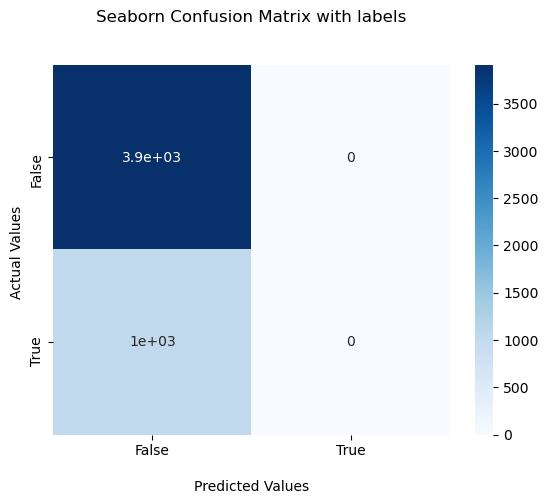

In [24]:
#################################### Validate our data using unseen test-set ###################################

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)
print(cm)

matrix = classification_report(y_test,y_pred_class)
print('Classification report : \n',matrix)


#################################### Plot Confusion Matrix ####################################################

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/28
14853/14853 [==============================] - 14s 958us/step - loss: 0.4179 - accuracy: 0.7978 - val_loss: 0.4005 - val_accuracy: 0.8017
Epoch 2/28
14853/14853 [==============================] - 14s 949us/step - loss: 0.3887 - accuracy: 0.8120 - val_loss: 0.3832 - val_accuracy: 0.8063
Epoch 3/28
14853/14853 [==============================] - 14s 931us/step - loss: 0.3803 - accuracy: 0.8149 - val_loss: 0.3823 - val_accuracy: 0.8083
Epoch 4/28
14853/14853 [==============================] - 14s 929us/step - loss: 0.3770 - accuracy: 0.8182 - val_loss: 0.3754 - val_accuracy: 0.8188
Epoch 5/28
14853/14853 [==============================] - 14s 931us/step - loss: 0.3759 - accuracy: 0.8202 - val_loss: 0.3734 - val_accuracy: 0.8206
Epoch 6/28
14853/14853 [==============================] - 14s 934us/step - loss: 0.3753 - accuracy: 0.8173 - val_loss: 0.3756 - val_accuracy: 0.8221
Epoch 7/28
14853/14853 [==============================] - 14s 932us/step - loss: 0.3751 - accuracy: 0.8192

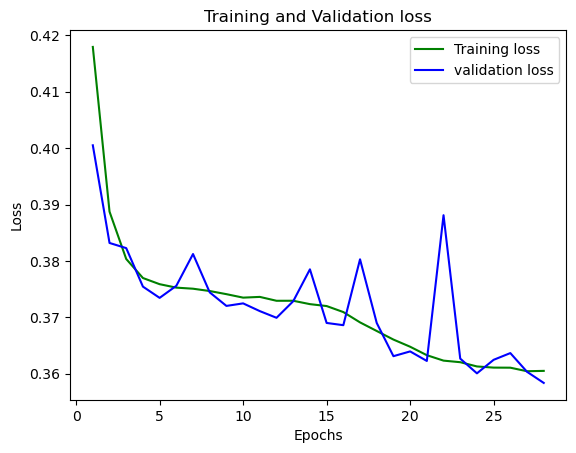

In [25]:
###################Plot the loss functions#########################

history = model.fit(x = x_train, y = y_train, epochs=28, batch_size=1,validation_data=(x_test, y_test))

loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,29)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

## High Lightning Density Area

In [26]:
#################################### Concatenate High-Lightning Density Areas ########################################################


# concatenate our training files into one dataframe
high_ts = [ jhb, ermelo, thaba, cedara]
result = pd.concat(high_ts)


# drop the null values
result = result.dropna()

#extract the features that we are going to use
result = result.iloc[:,5:12]
result.head()

# Create a scaled feature vector and output variable X,y
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(result.iloc[:,:-1])

Xs_high = pd.DataFrame(scaled_X)


# Create our feature vector X and our output variable y

X_high = result.iloc[:,:-1]
y_high = result.iloc[:,-1]


In [27]:
################################## Train model for High-Lightning Density Areas #################################################

k = 3

#split our data into train and test sets. We the use our training data for 5-fold cross-validation

x_train, x_test, y_train, y_test = train_test_split(Xs_high, y_high)

kfold = KFold(n_splits=k)

#initialzie arrays to take average of training accuracy
train_accuracy = []
test_accuracy = []

#initialize callbacks
es = EarlyStopping(monitor='loss')
mc = ModelCheckpoint('best_model2.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

cvscores = []
j = 0
for train,test in kfold.split(x_train,y_train):
    j = j+1
    model = Sequential()
#     model.add(BatchNormalization())
    model.add(Dense(4, input_dim=6, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Iteration: ", j)
    model.fit(x = x_train, y = y_train, epochs=29, batch_size=8, callbacks=[es, mc])
        ###########save and load best model##############
    # load the saved model
    saved_model = keras.models.load_model('best_model2.h5')
    # evaluate the model
    _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
    #print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


Iteration:  1
Epoch 1/29
920/983 [===========================>..] - ETA: 0s - loss: 0.5279 - accuracy: 0.7770
Epoch 00001: accuracy improved from -inf to 0.77936, saving model to best_model2.h5
983/983 [==============================] - 1s 614us/step - loss: 0.5246 - accuracy: 0.7794
Epoch 2/29
971/983 [============================>.] - ETA: 0s - loss: 0.4967 - accuracy: 0.7848
Epoch 00002: accuracy improved from 0.77936 to 0.78471, saving model to best_model2.h5
983/983 [==============================] - 1s 632us/step - loss: 0.4965 - accuracy: 0.7847
Iteration:  2
Epoch 1/29
981/983 [============================>.] - ETA: 0s - loss: 0.5577 - accuracy: 0.7554
Epoch 00001: accuracy did not improve from 0.78471
983/983 [==============================] - 1s 616us/step - loss: 0.5582 - accuracy: 0.7549
Epoch 2/29
972/983 [============================>.] - ETA: 0s - loss: 0.5176 - accuracy: 0.7855
Epoch 00002: accuracy improved from 0.78471 to 0.78483, saving model to best_model2.h5
983/98

In [28]:
# ###########save and load best model##############
# # load the saved model
# saved_model = keras.models.load_model('best_model2.h5')
# # evaluate the model
# _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('train Accuracy', Average(train_accuracy))
print('test Accuracy', Average(test_accuracy))

train Accuracy 0.784747838973999
test Accuracy 0.7891857425371805


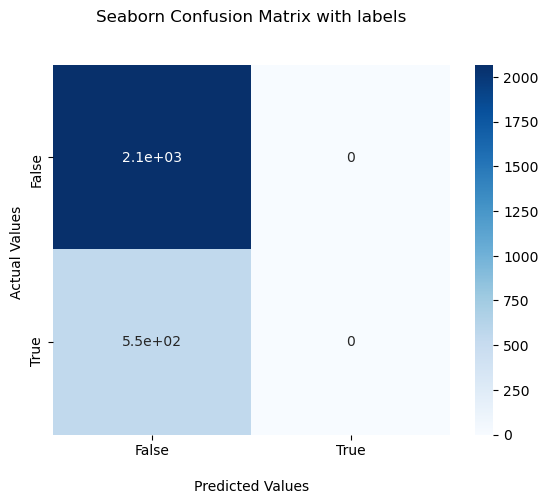

In [29]:
#################################### Plot Confusion Matrix ####################################################

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/28
7859/7859 [==============================] - 8s 959us/step - loss: 0.4940 - accuracy: 0.7838 - val_loss: 0.4725 - val_accuracy: 0.7790
Epoch 2/28
7859/7859 [==============================] - 7s 937us/step - loss: 0.4516 - accuracy: 0.7817 - val_loss: 0.4271 - val_accuracy: 0.7859
Epoch 3/28
7859/7859 [==============================] - 7s 947us/step - loss: 0.4187 - accuracy: 0.7904 - val_loss: 0.3975 - val_accuracy: 0.8015
Epoch 4/28
7859/7859 [==============================] - 7s 945us/step - loss: 0.3947 - accuracy: 0.8020 - val_loss: 0.3814 - val_accuracy: 0.8027
Epoch 5/28
7859/7859 [==============================] - 7s 930us/step - loss: 0.3826 - accuracy: 0.8088 - val_loss: 0.3723 - val_accuracy: 0.8107
Epoch 6/28
7859/7859 [==============================] - 7s 938us/step - loss: 0.3775 - accuracy: 0.8113 - val_loss: 0.3700 - val_accuracy: 0.8141
Epoch 7/28
7859/7859 [==============================] - 7s 929us/step - loss: 0.3749 - accuracy: 0.8149 - val_loss: 0.3702 -

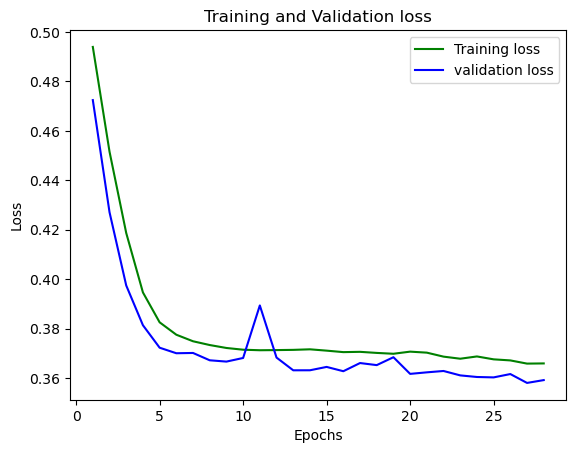

In [30]:
###################Plot the loss functions#########################

history = model.fit(x = x_train, y = y_train, epochs=28, batch_size=1,validation_data=(x_test, y_test))

loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,29)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

## Low Lightning Density Area

In [31]:
# ################################### Concatenate Low-Lightning Density Areas ########################################################
thaba
# concatenate our training files into one dataframe
low_ts = [ welkom, cape, kuruman, ottosdal]
result = pd.concat(low_ts)


# drop the null values
result = result.dropna()

#extract the features that we are going to use
result = result.iloc[:,5:12]
result.head()

# Create a scaled feature vector and output variable X,y
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(result.iloc[:,:-1])

Xs = pd.DataFrame(scaled_X)


# Create our feature vector X and our output variable y

X = result.iloc[:,:-1]
y = result.iloc[:,-1]


In [32]:
################################## Train model for Low-Lightning Density Areas #################################################
k = 3

#split our data into train and test sets. We the use our training data for 5-fold cross-validation

x_train, x_test, y_train, y_test = train_test_split(Xs, y)

#initialzie arrays to take average of training accuracy
train_accuracy = []
test_accuracy = []


kfold = KFold(n_splits=k)

#initialize callbacks
es = EarlyStopping(monitor='loss')
mc = ModelCheckpoint('best_model3.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

cvscores = []
j = 0
for train,test in kfold.split(x_train,y_train):
    j = j+1
    model = Sequential()
#     model.add(BatchNormalization())
    model.add(Dense(4, input_dim=6, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Iteration: ", j)
    model.fit(x = x_train, y = y_train, epochs=29, batch_size=8, callbacks=[es, mc])
    
    # load the saved model
    saved_model = keras.models.load_model('best_model3.h5')
    # evaluate the model
    _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
#     print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


Iteration:  1
Epoch 1/29
821/875 [===========================>..] - ETA: 0s - loss: 0.5095 - accuracy: 0.7902
Epoch 00001: accuracy improved from -inf to 0.79022, saving model to best_model3.h5
875/875 [==============================] - 1s 624us/step - loss: 0.5080 - accuracy: 0.7902
Epoch 2/29
804/875 [==========================>...] - ETA: 0s - loss: 0.4633 - accuracy: 0.8022
Epoch 00002: accuracy improved from 0.79022 to 0.80395, saving model to best_model3.h5
875/875 [==============================] - 1s 636us/step - loss: 0.4629 - accuracy: 0.8039
Iteration:  2
Epoch 1/29
829/875 [===========================>..] - ETA: 0s - loss: 0.4960 - accuracy: 0.8050
Epoch 00001: accuracy did not improve from 0.80395
875/875 [==============================] - 1s 610us/step - loss: 0.4973 - accuracy: 0.8039
Epoch 2/29
807/875 [==========================>...] - ETA: 0s - loss: 0.4795 - accuracy: 0.8020
Epoch 00002: accuracy did not improve from 0.80395
875/875 [==============================] -

In [33]:
# ###########save and load best model##############
# # load the saved model
# saved_model = keras.models.load_model('best_model3.h5')
# # evaluate the model
# _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('train Accuracy', Average(train_accuracy))
print('test Accuracy', Average(test_accuracy))

train Accuracy 0.8039467930793762
test Accuracy 0.7937392592430115


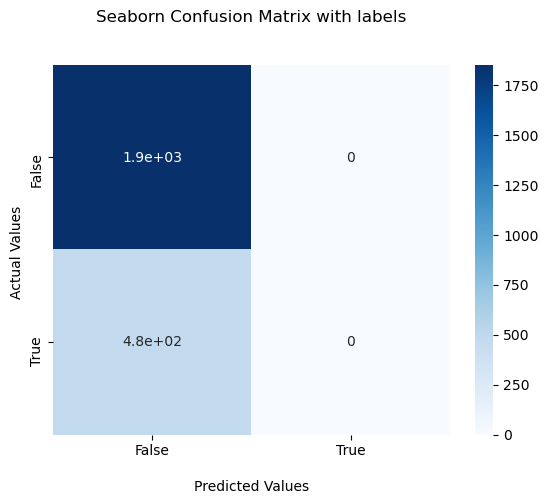

In [34]:
#################################### Plot Confusion Matrix ####################################################

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/28
6993/6993 [==============================] - 7s 947us/step - loss: 0.4346 - accuracy: 0.8054 - val_loss: 0.4308 - val_accuracy: 0.8019
Epoch 2/28
6993/6993 [==============================] - 7s 949us/step - loss: 0.4118 - accuracy: 0.8107 - val_loss: 0.4125 - val_accuracy: 0.8070
Epoch 3/28
6993/6993 [==============================] - 7s 947us/step - loss: 0.3980 - accuracy: 0.8165 - val_loss: 0.4019 - val_accuracy: 0.8057
Epoch 4/28
6993/6993 [==============================] - 7s 935us/step - loss: 0.3875 - accuracy: 0.8188 - val_loss: 0.3926 - val_accuracy: 0.8190
Epoch 5/28
6993/6993 [==============================] - 7s 932us/step - loss: 0.3809 - accuracy: 0.8234 - val_loss: 0.3890 - val_accuracy: 0.8139
Epoch 6/28
6993/6993 [==============================] - 7s 938us/step - loss: 0.3755 - accuracy: 0.8244 - val_loss: 0.3968 - val_accuracy: 0.8066
Epoch 7/28
6993/6993 [==============================] - 7s 935us/step - loss: 0.3723 - accuracy: 0.8247 - val_loss: 0.3835 -

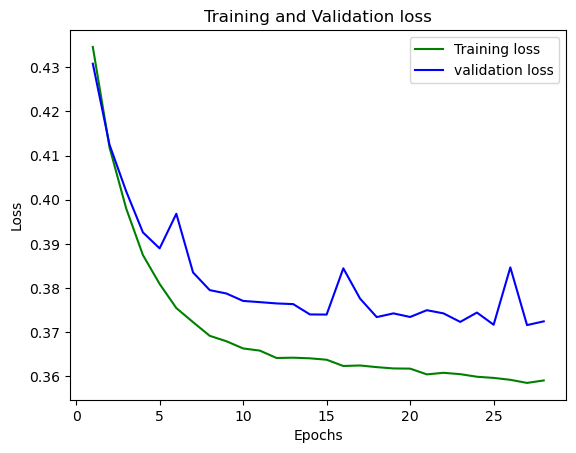

In [35]:
#################################### Plot Loss Functions ####################################################

history = model.fit(x = x_train, y = y_train, epochs=28, batch_size=1,validation_data=(x_test, y_test))

loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,29)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

# Radial Basis Function Network

In [36]:
###RBFN
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):

        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.units,
            "arg2": self.gamma,
        })
        return config

In [37]:
### Model w/o standardization
X = result.iloc[:,:-1]
y = result.iloc[:,-1]


##standardize our model using minmaxscaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(result.iloc[:,:-1])

#standardized feature array
Xs = pd.DataFrame(scaled_X)


# Plot our standardized feature vector Xs
display(Xs)

#split our data into train and test sets. 
x_train, x_test, y_train, y_test = train_test_split(Xs, y)

,0,1,2,3,4,5
0,0.673554,0.367347,0.263345,0.994444,0.145920,0.0
1,0.673554,0.367347,0.252669,0.994444,0.132222,0.0
2,0.549587,0.642857,0.231317,0.038889,0.161406,0.0
3,0.545455,0.653061,0.217082,0.047222,0.159619,0.0
4,0.533058,0.693878,0.224199,0.969444,0.170935,0.0
...,...,...,...,...,...,...
9320,0.421488,0.877551,0.000000,0.000000,0.082787,0.0
9321,0.485537,0.765306,0.053381,0.997222,0.053008,0.0
9322,0.607438,0.489796,0.078292,0.877778,0.055390,0.0
9323,0.510331,0.887755,0.113879,0.944444,0.055390,0.0


In [38]:
####################################### K-fold crossvalidation ####################################### 
#set K = 5
###RBFN
k = 3

#initialzie arrays to take average of training accuracy
train_accuracy = []
test_accuracy = []

#kfold

kfold = KFold(n_splits = k)

#initialize callbacks
es = EarlyStopping(monitor='loss')
mc = ModelCheckpoint('best_model4.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)


cvscores = []
j = 0
for train,test in kfold.split(x_train,y_train):
    j = j + 1
    #### Create our RBFNN model #
    model = Sequential()
    model.add(Dense(4, input_dim=6))
    model.add(RBFLayer(4, 0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Iteration: ", k)
    model.fit(x = x_train, y = y_train, epochs=29, batch_size=8, callbacks=[es, mc])
    model.save("RBFLayer")
    saved_model = keras.models.load_model('RBFLayer')
    # evaluate the model
    _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
#     print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

Iteration:  3
Epoch 1/29
858/875 [============================>.] - ETA: 0s - loss: 0.5872 - accuracy: 0.7104
Epoch 00001: accuracy improved from -inf to 0.71243, saving model to best_model4.h5
875/875 [==============================] - 1s 657us/step - loss: 0.5849 - accuracy: 0.7124
Epoch 2/29
856/875 [============================>.] - ETA: 0s - loss: 0.4679 - accuracy: 0.8002
Epoch 00002: accuracy improved from 0.71243 to 0.80080, saving model to best_model4.h5
875/875 [==============================] - 1s 659us/step - loss: 0.4670 - accuracy: 0.8008
INFO:tensorflow:Assets written to: RBFLayer/assets
Iteration:  3
Epoch 1/29
823/875 [===========================>..] - ETA: 0s - loss: 0.5117 - accuracy: 0.7899
Epoch 00001: accuracy did not improve from 0.80080
875/875 [==============================] - 1s 674us/step - loss: 0.5084 - accuracy: 0.7908
Epoch 2/29
846/875 [============================>.] - ETA: 0s - loss: 0.4445 - accuracy: 0.8014
Epoch 00002: accuracy did not improve from

In [39]:
###########save and load best model##############
# load the saved model
# saved_model = keras.models.load_model('RBFLayer')
# # evaluate the model
# _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

print('train Accuracy', Average(train_accuracy))
print('test Accuracy', Average(test_accuracy))

train Accuracy 0.8008008003234863
test Accuracy 0.8031732439994812


[[1873    0]
 [ 459    0]]


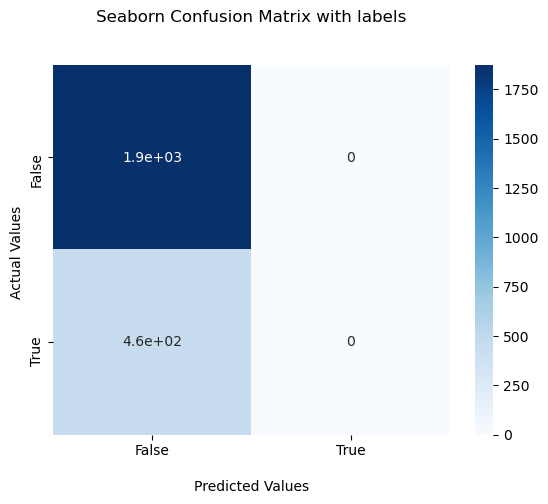

In [40]:
#################################### Plot Confusion Matrix ####################################################
###RBFN
#Show predicted Class
y_pred_class = np.argmax(model.predict(x_test), axis = 1)

#Det confusion matrix
cm = confusion_matrix(y_test,y_pred_class)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/28
6993/6993 [==============================] - 7s 988us/step - loss: 0.4223 - accuracy: 0.8007 - val_loss: 0.4107 - val_accuracy: 0.8036
Epoch 2/28
6993/6993 [==============================] - 7s 998us/step - loss: 0.4019 - accuracy: 0.8017 - val_loss: 0.3958 - val_accuracy: 0.8087
Epoch 3/28
6993/6993 [==============================] - 7s 973us/step - loss: 0.3889 - accuracy: 0.8080 - val_loss: 0.3880 - val_accuracy: 0.8105
Epoch 4/28
6993/6993 [==============================] - 7s 967us/step - loss: 0.3804 - accuracy: 0.8184 - val_loss: 0.3808 - val_accuracy: 0.8143
Epoch 5/28
6993/6993 [==============================] - 7s 957us/step - loss: 0.3745 - accuracy: 0.8231 - val_loss: 0.3791 - val_accuracy: 0.8160
Epoch 6/28
6993/6993 [==============================] - 7s 969us/step - loss: 0.3723 - accuracy: 0.8204 - val_loss: 0.3746 - val_accuracy: 0.8173
Epoch 7/28
6993/6993 [==============================] - 7s 964us/step - loss: 0.3703 - accuracy: 0.8241 - val_loss: 0.3729 -

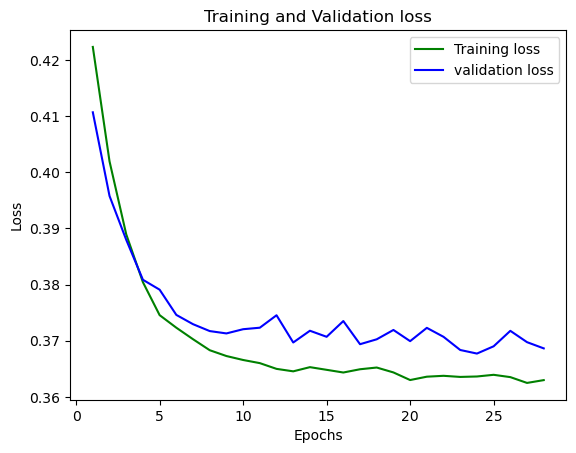

In [41]:
################################# Plot Training and Validation Loss ############################################
###RBFN
history = model.fit(x = x_train, y = y_train, epochs=28, batch_size=1,validation_data=(x_test, y_test))

loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,29)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()


## RBFN - High Lightning Density Area

In [42]:
#################################### Concatenate High-Lightning Density Areas ########################################################


# concatenate our training files into one dataframe
high_ts = [ jhb, ermelo, thaba, cedara]
result = pd.concat(high_ts)


# drop the null values
result = result.dropna()

#extract the features that we are going to use
result = result.iloc[:,5:12]
result.head()

# Create a scaled feature vector and output variable X,y
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(result.iloc[:,:-1])

Xs = pd.DataFrame(scaled_X)


# Create our feature vector X and our output variable y

X = result.iloc[:,:-1]
y = result.iloc[:,-1]


In [43]:
################################## Train model for Low-Lightning Density Areas #################################################

#split our data into train and test sets. We the use our training data for 5-fold cross-validation

x_train, x_test, y_train, y_test = train_test_split(Xs, y)
k = 3

#initialzie arrays to take average of training accuracy
train_accuracy = []
test_accuracy = []

kfold = KFold(n_splits=k)

#initialize callbacks
es = EarlyStopping(monitor='loss')
mc = ModelCheckpoint('best_model5.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)


cvscores = []
j = 0
for train,test in kfold.split(x_train,y_train):
    j = j+1
    #### Create our RBFNN model #
    model = Sequential()
    model.add(Dense(4, input_dim=6))
    model.add(RBFLayer(10, 0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Iteration: ", k)
    model.fit(x = x_train, y = y_train, epochs=29, batch_size=8, callbacks=[es, mc])
    model.save("RBFLayer2")
    saved_model = keras.models.load_model('RBFLayer2')
    # evaluate the model
    _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
#     print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

Iteration:  3
Epoch 1/29
922/983 [===========================>..] - ETA: 0s - loss: 0.5011 - accuracy: 0.7812
Epoch 00001: accuracy improved from -inf to 0.78127, saving model to best_model5.h5
983/983 [==============================] - 1s 667us/step - loss: 0.4991 - accuracy: 0.7813
Epoch 2/29
980/983 [============================>.] - ETA: 0s - loss: 0.4549 - accuracy: 0.7810
Epoch 00002: accuracy did not improve from 0.78127
983/983 [==============================] - 1s 669us/step - loss: 0.4547 - accuracy: 0.7813
INFO:tensorflow:Assets written to: RBFLayer2/assets
Iteration:  3
Epoch 1/29
952/983 [============================>.] - ETA: 0s - loss: 0.4822 - accuracy: 0.7812
Epoch 00001: accuracy did not improve from 0.78127
983/983 [==============================] - 1s 638us/step - loss: 0.4821 - accuracy: 0.7813
Epoch 2/29
938/983 [===========================>..] - ETA: 0s - loss: 0.4485 - accuracy: 0.7803
Epoch 00002: accuracy did not improve from 0.78127
983/983 [=================

In [44]:
# ###########save and load best model##############
# saved_model = keras.models.load_model('RBFLayer2')
# # evaluate the model
# _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('train Accuracy', Average(train_accuracy))
print('test Accuracy', Average(test_accuracy))

train Accuracy 0.7812274893124899
test Accuracy 0.800000011920929


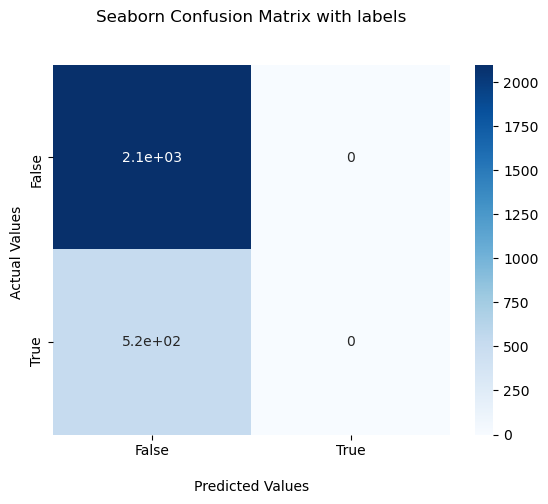

In [45]:
################################# Plot Confusion Matrix ############################################


y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/28
7859/7859 [==============================] - 8s 973us/step - loss: 0.4327 - accuracy: 0.7810 - val_loss: 0.3999 - val_accuracy: 0.8004
Epoch 2/28
7859/7859 [==============================] - 8s 989us/step - loss: 0.3990 - accuracy: 0.7839 - val_loss: 0.3799 - val_accuracy: 0.8038
Epoch 3/28
7859/7859 [==============================] - 8s 982us/step - loss: 0.3836 - accuracy: 0.7969 - val_loss: 0.3751 - val_accuracy: 0.8019
Epoch 4/28
7859/7859 [==============================] - 8s 993us/step - loss: 0.3758 - accuracy: 0.8054 - val_loss: 0.3662 - val_accuracy: 0.8149
Epoch 5/28
7859/7859 [==============================] - 8s 979us/step - loss: 0.3716 - accuracy: 0.8094 - val_loss: 0.3646 - val_accuracy: 0.8168
Epoch 6/28
7859/7859 [==============================] - 8s 970us/step - loss: 0.3707 - accuracy: 0.8104 - val_loss: 0.3648 - val_accuracy: 0.8145
Epoch 7/28
7859/7859 [==============================] - 8s 964us/step - loss: 0.3685 - accuracy: 0.8102 - val_loss: 0.3633 -

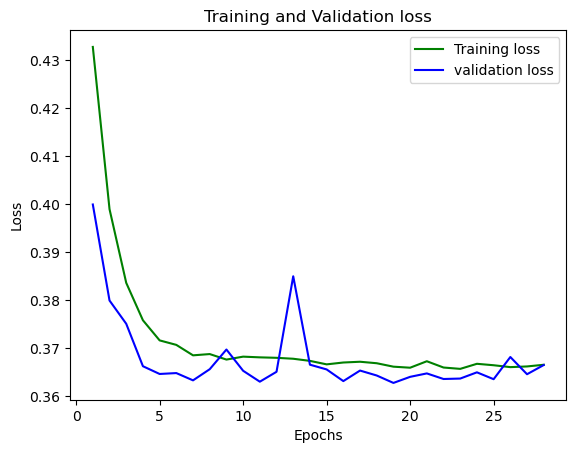

In [46]:
################################# Plot Training and Validation Loss ############################################


history = model.fit(x = x_train, y = y_train, epochs=28, batch_size=1,validation_data=(x_test, y_test))

loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,29)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

## RBFN - Low Lightning Density Area

In [47]:
# ################################### Concatenate Low-Lightning Density Areas ########################################################
thaba
# concatenate our training files into one dataframe
low_ts = [ welkom, cape, kuruman, ottosdal]
result = pd.concat(low_ts)


# drop the null values
result = result.dropna()

#extract the features that we are going to use
result = result.iloc[:,5:12]
result.head()

# Create a scaled feature vector and output variable X,y
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(result.iloc[:,:-1])

Xs = pd.DataFrame(scaled_X)


# Create our feature vector X and our output variable y

X = result.iloc[:,:-1]
y = result.iloc[:,-1]


In [48]:
################################## Train model for Low-Lightning Density Areas #################################################

#split our data into train and test sets. We the use our training data for 5-fold cross-validation

x_train, x_test, y_train, y_test = train_test_split(Xs, y)
k = 3
kfold = KFold(n_splits=k)

#initialzie arrays to take average of training accuracy
train_accuracy = []
test_accuracy = []

#initialize callbacks
es = EarlyStopping(monitor='loss')
mc = ModelCheckpoint('best_model6.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)


cvscores = []
j = 0
for train,test in kfold.split(x_train,y_train):
    j = j+1
    #### Create our RBFNN model #
    model = Sequential()
    model.add(Dense(4, input_dim=6))
    model.add(RBFLayer(10, 0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Iteration: ", k)
    model.fit(x = x_train, y = y_train, epochs=29, batch_size=8, callbacks=[es, mc])
    model.save("RBFLayer3")
    saved_model = keras.models.load_model('RBFLayer3')
    # evaluate the model
    _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
    _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
#     print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


Iteration:  3
Epoch 1/29
832/875 [===========================>..] - ETA: 0s - loss: 0.5832 - accuracy: 0.7151
Epoch 00001: accuracy improved from -inf to 0.71943, saving model to best_model6.h5
875/875 [==============================] - 1s 787us/step - loss: 0.5784 - accuracy: 0.7194
Epoch 2/29
859/875 [============================>.] - ETA: 0s - loss: 0.4638 - accuracy: 0.7964
Epoch 00002: accuracy improved from 0.71943 to 0.79794, saving model to best_model6.h5
875/875 [==============================] - 1s 717us/step - loss: 0.4615 - accuracy: 0.7979
INFO:tensorflow:Assets written to: RBFLayer3/assets
Iteration:  3
Epoch 1/29
852/875 [============================>.] - ETA: 0s - loss: 0.4922 - accuracy: 0.7983
Epoch 00001: accuracy did not improve from 0.79794
875/875 [==============================] - 1s 653us/step - loss: 0.4917 - accuracy: 0.7979
Epoch 2/29
845/875 [===========================>..] - ETA: 0s - loss: 0.4334 - accuracy: 0.8000
Epoch 00002: accuracy improved from 0.797

In [49]:
###########save and load best model##############
# saved_model = keras.models.load_model('RBFLayer3')
# # evaluate the model
# _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('train Accuracy', Average(train_accuracy))
print('test Accuracy', Average(test_accuracy))

train Accuracy 0.7979884545008341
test Accuracy 0.8117495775222778


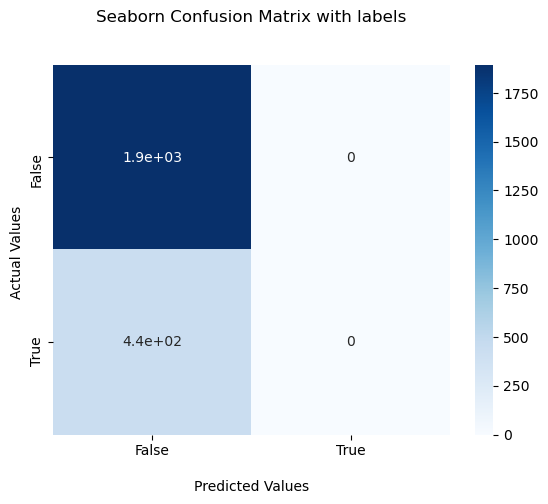

In [50]:
y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

y_pred_class = np.argmax(model.predict(x_test), axis = 1)

cm = confusion_matrix(y_test,y_pred_class)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/28
6993/6993 [==============================] - 7s 971us/step - loss: 0.4192 - accuracy: 0.8008 - val_loss: 0.3846 - val_accuracy: 0.8130
Epoch 2/28
6993/6993 [==============================] - 7s 960us/step - loss: 0.3937 - accuracy: 0.8135 - val_loss: 0.3727 - val_accuracy: 0.8156
Epoch 3/28
6993/6993 [==============================] - 7s 958us/step - loss: 0.3834 - accuracy: 0.8185 - val_loss: 0.3626 - val_accuracy: 0.8268
Epoch 4/28
6993/6993 [==============================] - 7s 956us/step - loss: 0.3781 - accuracy: 0.8197 - val_loss: 0.3602 - val_accuracy: 0.8319
Epoch 5/28
6993/6993 [==============================] - 7s 959us/step - loss: 0.3752 - accuracy: 0.8198 - val_loss: 0.3532 - val_accuracy: 0.8383
Epoch 6/28
6993/6993 [==============================] - 7s 955us/step - loss: 0.3734 - accuracy: 0.8227 - val_loss: 0.3587 - val_accuracy: 0.8302
Epoch 7/28
6993/6993 [==============================] - 7s 978us/step - loss: 0.3728 - accuracy: 0.8234 - val_loss: 0.3535 -

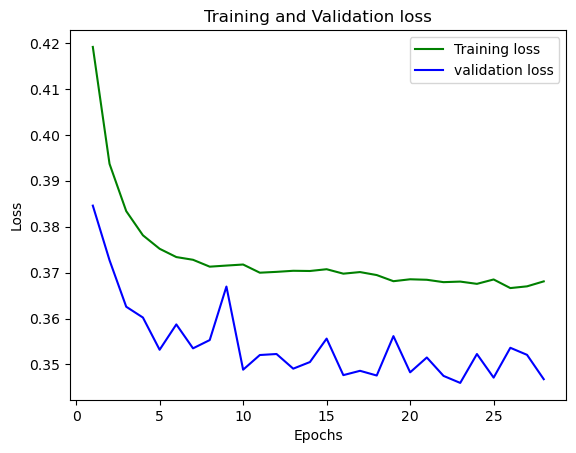

In [51]:
history = model.fit(x = x_train, y = y_train, epochs=28, batch_size=1,validation_data=(x_test, y_test))

loss_train = history.history['loss']

loss_val = history.history['val_loss']

epochs = range(1,29)

plt.plot(epochs, loss_train, 'g', label='Training loss')

plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()